# Data preprocessing and split

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.13.0


In [89]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data.dropna()
regression_data = data.loc[data['Knocking'] == 0]
regression_data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
547,546.0,2000,-10,30,283,0.975,288.8,1.069,858.7,36.89,39.8,27.96,1.33,8.67,10.1,307.4,2.91,222.7,0.0,0.0
548,547.0,2000,-10,30,293,0.974,295.5,1.068,858.6,36.61,39.5,27.48,1.32,8.6,9.98,307.2,2.99,220.9,0.0,0.0
549,548.0,2000,-10,30,303,0.974,302.3,1.067,858.1,36.35,39.2,27.62,1.31,8.53,9.86,307.5,3.03,221.4,0.0,0.0
550,549.0,2000,-10,35,283,0.982,288.8,1.07,861.2,37.35,40.9,27.25,1.39,8.82,10.31,304.4,3.23,215.2,0.0,0.0
551,550.0,2000,-10,35,293,0.982,295.6,1.069,858.9,37.1,40.6,27.41,1.39,8.75,10.19,306.1,3.09,221.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [90]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Case                             1064 non-null   float64
 1   Engine Speed                     1064 non-null   object 
 2   Spark Timing                     1064 non-null   object 
 3   Throttle Angle                   1064 non-null   object 
 4   Ambient Temperature              1064 non-null   object 
 5   Intake Pressure                  1064 non-null   object 
 6   Intake Temperature               1064 non-null   object 
 7   Exhaust Pressure                 1064 non-null   object 
 8   Exhaust Temperature              1064 non-null   object 
 9   Injected Mass                    1064 non-null   object 
 10  Maximum Pressure                 1064 non-null   object 
 11  Crank Angle at Maximum Pressure  1064 non-null   object 
 12  Maximum Rate of Pressur

In [91]:
input_data = regression_data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]
input_data
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Engine Speed         1064 non-null   object
 1   Spark Timing         1064 non-null   object
 2   Throttle Angle       1064 non-null   object
 3   Ambient Temperature  1064 non-null   object
 4   Intake Pressure      1064 non-null   object
 5   Intake Temperature   1064 non-null   object
 6   Exhaust Pressure     1064 non-null   object
 7   Exhaust Temperature  1064 non-null   object
 8   Injected Mass        1064 non-null   object
dtypes: object(9)
memory usage: 83.1+ KB


In [92]:
output_data = regression_data.iloc[:, [10, 11, 12, 13, 14, 15, 16, 17]]
output_data
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Maximum Pressure                 1064 non-null   object
 1   Crank Angle at Maximum Pressure  1064 non-null   object
 2   Maximum Rate of Pressure Rise    1064 non-null   object
 3   BMEP                             1064 non-null   object
 4   IMEP                             1064 non-null   object
 5   BSFC                             1064 non-null   object
 6   BSNOx                            1064 non-null   object
 7   BSCO                             1064 non-null   object
dtypes: object(8)
memory usage: 74.8+ KB


In [93]:
input_data=input_data.astype('float')
output_data = output_data.astype('float')
input_data.info()
output_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Engine Speed         1064 non-null   float64
 1   Spark Timing         1064 non-null   float64
 2   Throttle Angle       1064 non-null   float64
 3   Ambient Temperature  1064 non-null   float64
 4   Intake Pressure      1064 non-null   float64
 5   Intake Temperature   1064 non-null   float64
 6   Exhaust Pressure     1064 non-null   float64
 7   Exhaust Temperature  1064 non-null   float64
 8   Injected Mass        1064 non-null   float64
dtypes: float64(9)
memory usage: 83.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 547 to 2145
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Maximum Pressure                 1064 non-null   float64
 1   Crank Angle 

In [94]:
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, shuffle = True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42)
print(train_input.shape, train_output.shape)
print(val_input.shape, val_output.shape)
print(test_input.shape, test_output.shape)


(638, 9) (638, 8)
(213, 9) (213, 8)
(213, 9) (213, 8)


In [95]:
print(test_output.index)

Index([ 578, 2135, 1282, 1743, 1854, 1499, 1510, 1522,  746, 1280,
       ...
       1465, 1993, 2019, 1216,  766, 1512,  715,  780, 2087,  572],
      dtype='int64', length=213)


In [96]:
ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale =  ss.transform(val_input)
test_scale =  ss.transform(test_input)

# DNN Model

In [97]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='relu', input_shape = (9, )))
model.add(keras.layers.Dense(128, activation= 'relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation= 'relu'))
model.add(keras.layers.Dense(16, activation= 'relu'))
model.add(keras.layers.Dense(8))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 256)               2560      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
Total params: 46456 (181.47 KB)
Trainable params: 4645

In [98]:
callback = keras.callbacks.EarlyStopping(monitor = 'loss', patience=10, verbose=True)
model.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss = 'mse', metrics=['mae', 'mse'])
history = model.fit(train_scale, train_output, validation_data=(val_scale, val_output) ,epochs=1000, callbacks=[callback])

Epoch 1/1000
20/20 [==============================] - 0s 7ms/step - loss: 25212.7852 - mae: 89.7873 - mse: 25212.7852 - val_loss: 24489.5098 - val_mae: 88.5069 - val_mse: 24489.5098
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 22640.0234 - mae: 84.4844 - mse: 22640.0234 - val_loss: 17870.3398 - val_mae: 79.4060 - val_mse: 17870.3398
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 11126.3242 - mae: 71.8475 - mse: 11126.3242 - val_loss: 6741.9941 - val_mae: 57.0607 - val_mse: 6741.9941
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 4609.2246 - mae: 45.2495 - mse: 4609.2246 - val_loss: 2732.6921 - val_mae: 34.7665 - val_mse: 2732.6921
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 1820.3628 - mae: 27.3676 - mse: 1820.3628 - val_loss: 956.4721 - val_mae: 20.3736 - val_mse: 956.4721
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 655.3391 - mae: 15.9036 - ms

In [99]:
def plot_history(history):
    hist = history.history
    hist['epochs'] = history.epoch

    fig, axes = plt.subplots(1, 3, constrained_layout = True, figsize = (10, 5))
    axes[0].plot(hist['epochs'], hist['loss'], label = 'Training_loss')
    axes[0].plot(hist['epochs'], hist['val_loss'], label = 'val_loss')
    axes[1].plot(hist['epochs'], hist['mae'], label = 'Training_mae')
    axes[1].plot(hist['epochs'], hist['val_mae'], label = 'val_mae')
    axes[2].plot(hist['epochs'], hist['mse'], label = 'Training_mse')
    axes[2].plot(hist['epochs'], hist['val_mse'], label = 'val_mse')
    axes[0].set_title('Training and validation loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[1].set_title('Training and validation mae')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('MAE')
    axes[2].set_title('Training and validation mse')
    axes[2].set_xlabel('Epochs')
    axes[2].set_ylabel('MSE')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()
    plt.show()
    


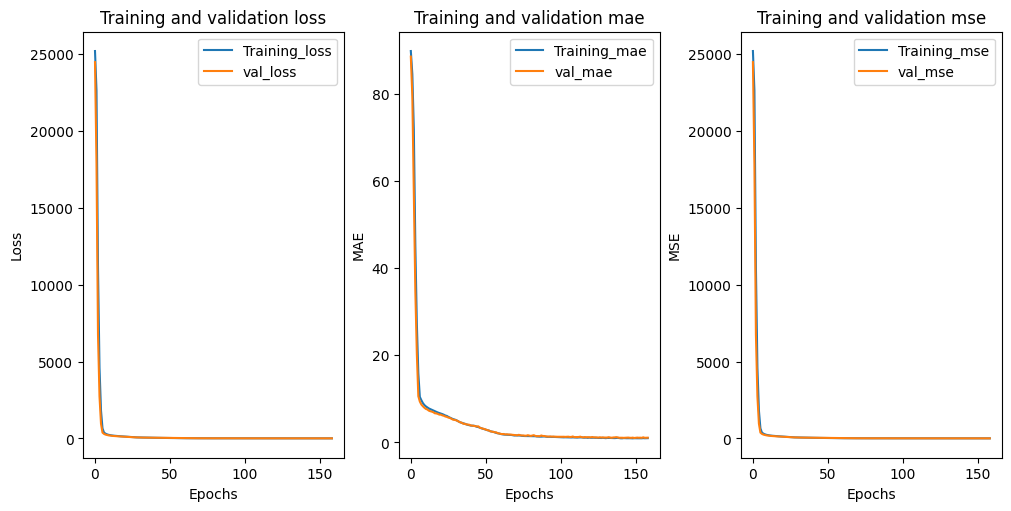

In [100]:
plot_history(history)

In [101]:
model.evaluate(test_scale, test_output)
model.evaluate(train_scale, train_output)
model.evaluate(val_scale, val_output)

7/7 [==============================] - 0s 940us/step - loss: 3.0899 - mae: 1.1024 - mse: 3.0899


[3.0898537635803223, 1.1024010181427002, 3.0898537635803223]

In [102]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)

7/7 [==============================] - 0s 750us/step


In [103]:
predicted_test_df = pd.DataFrame(predicted_test)
predicted_train_df = pd.DataFrame(predicted_train)
predicted_val_df = pd.DataFrame(predicted_val)

In [104]:
predicted_test_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_train_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']
predicted_val_df.columns = ['Maximum Pressure(predicted)', 'Crank Angle at Maximum Pressure(predicted)', 'Maximum Rate of Pressure Rise(predicted)', 'BMEP(predicted)',
                         'IMEP(predicted)', 'BSFC(predicted)', 'BSNOx(predicted)', 'BSCO(predicted)']

In [105]:
predicted_test_df.index = test_output.index
predicted_train_df.index = train_output.index
predicted_val_df.index = val_output.index

In [106]:
def DataFrame(predicted_df, df_outuput, output_df):
   for i in range(8):
      predicted_df.insert(2*i+1, df_outuput.columns[i], output_df.iloc[:, [i]])
   predicted_df

In [107]:
DataFrame(predicted_test_df, test_output, test_output)


In [111]:
DataFrame(predicted_train_df, train_output, train_output)

In [112]:
DataFrame(predicted_val_df, val_output, val_output)

In [110]:
predicted_test_df.to_csv("Predicted_result.csv")

In [113]:
predicted_train_df.to_csv("Predicted_train_result.csv")

In [114]:
predicted_val_df.to_csv("Predicted_val_result.csv")

In [109]:
#R2_score, mse 뽑기, 미리 시각화